In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("Datasets/Balanced_EST.csv")
df

,path,age,gender,chroma_stft,rms,spec_cent,spec_bw,rolloff,zcr,mfcc
0,common_voice_et_18901038.mp3,twenties,male,0.374634,0.079749,1249.345177,1203.207697,2307.273243,0.082681,-12.641043
1,common_voice_et_18901066.mp3,twenties,male,0.383847,0.110892,1204.333435,1286.444245,2417.378455,0.064155,-10.074480
2,common_voice_et_18901181.mp3,twenties,male,0.364218,0.070047,1379.127304,1423.911530,2716.563806,0.075511,-12.401386
3,common_voice_et_18370776.mp3,twenties,male,0.310396,0.111130,1807.703459,1912.632073,3416.454075,0.089347,-13.339600
4,common_voice_et_18370777.mp3,twenties,male,0.324734,0.076138,2286.324053,2068.363770,4246.545870,0.125317,-15.503075
5,common_voice_et_18370778.mp3,twenties,male,0.325377,0.084931,1635.496719,1645.562464,2959.159029,0.090253,-14.137097
6,common_voice_et_18370779.mp3,twenties,male,0.276516,0.108821,1379.253547,1526.091359,2470.035844,0.070336,-12.356443
7,common_voice_et_18136337.mp3,twenties,female,0.330436,0.087680,2791.056743,1915.656710,4717.087402,0.195969,-18.324036
8,common_voice_et_18136338.mp3,twenties,female,0.320390,0.090774,2692.560554,1919.941648,4617.943187,0.186910,-18.294170
9,common_voice_et_18136339.mp3,twenties,female,0.307859,0.090634,2306.692955,1686.101004,3950.411048,0.151342,-17.482666


# Lets see how balanced that data is

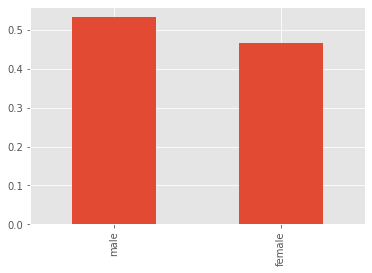

In [2]:
counts = df["gender"].value_counts()
counts = counts/sum(counts)
counts.plot(kind="bar")

In [3]:
# Making changes if needed

# Creating some models and comparing them

First lets split the data and then train some models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["chroma_stft","rms","spec_cent","spec_bw","rolloff","zcr","mfcc"]],df.gender,train_size=0.7)

#Decision tree
dct = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
dct_prediction = dct.predict(X_test)
print("Decision tree accuracy: "+str(accuracy_score(y_test,dct_prediction)))

#Random forest
rf = RandomForestClassifier().fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
print("Random Forest accuracy: "+str(accuracy_score(y_test,rf_prediction)))

#SVM linear
svm_linear = SVC(kernel='linear',probability=True).fit(X_train,y_train)
svm_linear_prediction = svm_linear.predict(X_test)
print("SVM linear: "+str(accuracy_score(y_test,svm_linear_prediction)))

# SVM POLY
#svm_poly = SVC(kernel='poly', degree=2 ,gamma='auto',probability=True).fit(X_train,y_train)
#svm_poly_prediction = svm_poly.predict(X_test)
#print("SVM poly: "+str(accuracy_score(y_test,svm_poly_prediction)))

# SVM RBF
#svm_rbf = SVC(kernel='rbf',gamma='auto',probability=True).fit(X_train,y_train)
#svm_rbf_prediction = svm_rbf.predict(X_test)
#print("SVM RBF: "+str(accuracy_score(y_test,svm_rbf_prediction)))

Decision tree accuracy: 0.8181818181818182
Random Forest accuracy: 0.8824833702882483


C:\Users\Risto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
plt.subplots(figsize=(16, 16))
x = np.arange(-5,5,0.25)
y = np.arange(-5,5,0.25)
xx, yy = np.meshgrid(x, y)
df = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})


feature_importances_rf = pd.Series(rf.feature_importances_, index= X_train.columns)
plt.subplot(3,4,1)
plt.title('Random Forest')
feature_importances_rf.sort_values().plot(kind='barh')

In [ ]:
#WORK IN PROGRESS - ROC (https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python)
val = y_test.to_frame()
probs = dct.predict_proba(X_test)
probs = probs[:,1]
fpr,tpr,thresholds = metrics.roc_curve(val,probs,pos_label="male")
roc_auc = metrics.auc(fpr, tpr)
# ROC PLOT
plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


val = y_test.to_frame()
probs = rf.predict_proba(X_test)
probs = probs[:,1]
fpr,tpr,thresholds = metrics.roc_curve(val,probs,pos_label="male")
roc_auc = metrics.auc(fpr, tpr)
# ROC PLOT
plt.title('ROC - RandomForest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

val = y_test.to_frame()
probs = svm_linear.predict_proba(X_test)
probs = probs[:,1]
fpr,tpr,thresholds = metrics.roc_curve(val,probs,pos_label="male")
roc_auc = metrics.auc(fpr, tpr)
# ROC PLOT
plt.title('ROC - SVM Linear')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()